In [3]:
using TaylorIntegration, Plots

In [4]:
u₀ = [0.0, 1.0]

t0 = 0.0  
tf = 2π
step = 0.1  
time_vector = t0:step:tf
order = 15
abstol = 1e-20

function harmonic(du, u, p, t)
    du[1] = u[2]
    du[2] = -u[1]
end

harmonic (generic function with 1 method)

In [5]:
solution = taylorinteg(harmonic, u₀, time_vector, order, abstol, maxsteps=5000)

63×2 transpose(::Matrix{Float64}) with eltype Float64:
  0.0        1.0
  0.0998334  0.995004
  0.198669   0.980067
  0.29552    0.955336
  0.389418   0.921061
  0.479426   0.877583
  0.564642   0.825336
  0.644218   0.764842
  0.717356   0.696707
  0.783327   0.62161
  0.841471   0.540302
  0.891207   0.453596
  0.932039   0.362358
  ⋮          
 -0.925815   0.377978
 -0.883455   0.468517
 -0.832267   0.554374
 -0.772764   0.634693
 -0.70554    0.70867
 -0.631267   0.775566
 -0.550686   0.834713
 -0.464602   0.88552
 -0.373877   0.927478
 -0.279415   0.96017
 -0.182163   0.983268
 -0.0830894  0.996542

In [6]:
varorder = 13
ξ = set_variables("ξ", numvars=2, order=varorder)
q0TN = u₀ .+ ξ

2-element Vector{TaylorN{Float64}}:
        1.0 ξ₁ + 𝒪(‖x‖¹⁴)
  1.0 + 1.0 ξ₂ + 𝒪(‖x‖¹⁴)

In [7]:
result = taylorinteg(harmonic, q0TN, time_vector, order, abstol, maxsteps=5000)

63×2 transpose(::Matrix{TaylorN{Float64}}) with eltype TaylorN{Float64}:
                                                                  1.0 ξ₁ + 𝒪(‖x‖¹⁴)  …                                                           1.0 + 1.0 ξ₂ + 𝒪(‖x‖¹⁴)
    0.09983341664682815 + 0.9950041652780257 ξ₁ + 0.09983341664682815 ξ₂ + 𝒪(‖x‖¹⁴)       0.9950041652780257 - 0.09983341664682815 ξ₁ + 0.9950041652780257 ξ₂ + 𝒪(‖x‖¹⁴)
    0.19866933079506122 + 0.9800665778412416 ξ₁ + 0.19866933079506122 ξ₂ + 𝒪(‖x‖¹⁴)       0.9800665778412416 - 0.19866933079506122 ξ₁ + 0.9800665778412416 ξ₂ + 𝒪(‖x‖¹⁴)
      0.2955202066613396 + 0.9553364891256061 ξ₁ + 0.2955202066613396 ξ₂ + 𝒪(‖x‖¹⁴)        0.9553364891256061 - 0.2955202066613396 ξ₁ + 0.9553364891256061 ξ₂ + 𝒪(‖x‖¹⁴)
    0.38941834230865047 + 0.9210609940028851 ξ₁ + 0.38941834230865047 ξ₂ + 𝒪(‖x‖¹⁴)       0.9210609940028851 - 0.38941834230865047 ξ₁ + 0.9210609940028851 ξ₂ + 𝒪(‖x‖¹⁴)
        0.479425538604203 + 0.8775825618903728 ξ₁ + 0.479425538604203 ξ₂ + 𝒪(‖x‖¹⁴

In [8]:
polar2cart(r, ϕ) = [r*cos(ϕ), r*sin(ϕ)] # convert radius r and angle ϕ to cartesian coordinates
r = 0.05 #the radius of the neighborhood
ϕ = 0.0:0.1:(2π+0.1) #the values of the angle
ξv = polar2cart.(r, ϕ)

64-element Vector{Vector{Float64}}:
 [0.05, 0.0]
 [0.049750208263901294, 0.004991670832341408]
 [0.04900332889206208, 0.009933466539753062]
 [0.047766824456280305, 0.014776010333066981]
 [0.04605304970014426, 0.01947091711543253]
 [0.04387912809451864, 0.02397127693021015]
 [0.041266780745483914, 0.028232123669751776]
 [0.038242109364224425, 0.03221088436188456]
 [0.03483533546735827, 0.035867804544976144]
 [0.03108049841353322, 0.039166345481374175]
 [0.02701511529340699, 0.04207354924039483]
 [0.02267980607127887, 0.044560368003071775]
 [0.01811788772383367, 0.04660195429836132]
 ⋮
 [0.023425833565018858, -0.04417273278600766]
 [0.02771871680895808, -0.04161337211119504]
 [0.031734643797131735, -0.03863822437779936]
 [0.035433488714563, -0.0352770162785196]
 [0.03877829392551251, -0.03156333189361604]
 [0.04173563924195799, -0.02753427712988188]
 [0.04427597584706597, -0.02323010897068783]
 [0.046373921537201795, -0.0186938332415118]
 [0.0480085143325183, -0.013970774909946294]
 [0.0

In [9]:
xjet_plot2 = map(λ->λ.(ξv), result[:,1])
vjet_plot2 = map(λ->λ.(ξv), result[:,2])

63-element Vector{Vector{Float64}}:
 [1.0, 1.0049916708323414, 1.009933466539753, 1.014776010333067, 1.0194709171154326, 1.02397127693021, 1.0282321236697518, 1.0322108843618845, 1.035867804544976, 1.0391663454813742  …  0.9613617756222006, 0.9647229837214804, 0.968436668106384, 0.9724657228701181, 0.9767698910293122, 0.9813061667584883, 0.9860292250900538, 0.9908918747863953, 0.9958455298591252, 1.0008406950242175]
 [0.9900124944456843, 0.9950041652780257, 0.9999958361103671, 1.0049376318177787, 1.0097801756110927, 1.0144750823934583, 1.0189754422082358, 1.0232362889477775, 1.0272150496399102, 1.0308719698230018  …  0.9533907931668306, 0.9563659409002263, 0.9597271489995062, 0.9634408333844097, 0.9674698881481438, 0.9717740563073378, 0.9763103320365139, 0.9810333903680795, 0.985896040064421, 0.9908496951371509]
 [0.9701331113014886, 0.9750749070089002, 0.9800665778412416, 0.985058248673583, 0.9900000443809946, 0.9948425881743086, 0.9995374949566742, 1.0040378547714517, 1.0082987015109

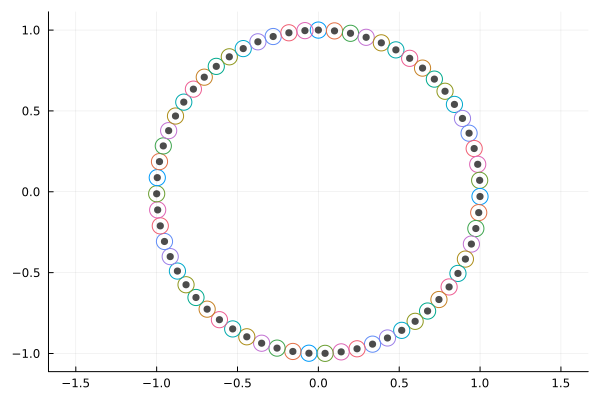

In [14]:
begin
    plot(xjet_plot2, vjet_plot2, legend=false)
    scatter!(solution[:,1], solution[:,2], color=:black, alpha = 0.7, aspect_ratio=:equal)
end

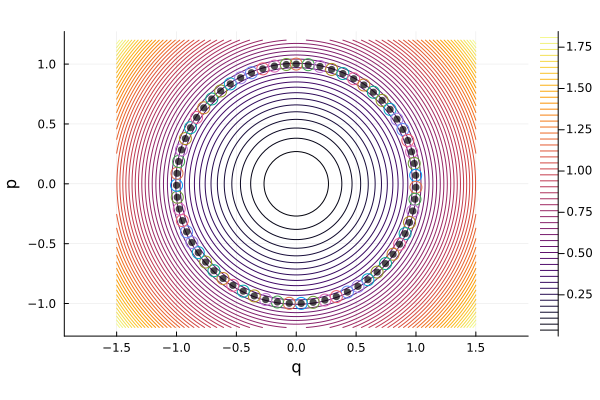

In [17]:

# Crear rangos para q y p
q = range(-1.5, stop=1.5, length=100)'
p = range(-1.2, stop=1.2, length=100)

H3 = @. p^2/2 + q^2/2

begin
    contour(q', p, H3, levels=50, xlabel="q", ylabel="p", aspect_ratio=:equal)
    plot!(xjet_plot2, vjet_plot2, legend=false)
    scatter!(solution[:,1], solution[:,2], color=:black, alpha = 0.7, aspect_ratio=:equal)
    
end

In [20]:
t0 = 0.0  
tf = 15
step = 0.1  
time_vector = t0:step:tf
order = 15
abstol = 1e-20

1.0e-20

In [70]:
function forced_oscillator(du, u, p, t)
    epsilon = 0.1  
    Omega = 6.5  
    F0 = 1.0

    du[1] = u[2]
    du[2] = -Omega^2 * u[1] + F0 * cos(Omega * (1 + epsilon) * t)
end

forced_oscillator (generic function with 1 method)

In [71]:
solution = taylorinteg(forced_oscillator, u₀, time_vector, order, abstol, maxsteps=5000)

13×2 transpose(::Matrix{Float64}) with eltype Float64:
  0.0         1.0
 -0.0264047  -1.2533
  0.0702134   1.43327
 -0.125831   -1.49004
  0.185189    1.39483
 -0.239208   -1.14554
  0.279458    0.767312
 -0.299698   -0.308189
  0.297013   -0.169559
 -0.272349    0.600665
  0.230326   -0.928669
 -0.178391    1.11608
  0.125435   -1.15104

In [72]:
varorder = 13
ξ = set_variables("ξ", numvars=2, order=varorder)
q0TN = u₀ .+ ξ

2-element Vector{TaylorN{Float64}}:
        1.0 ξ₁ + 𝒪(‖x‖¹⁴)
  1.0 + 1.0 ξ₂ + 𝒪(‖x‖¹⁴)

In [74]:
q0TN[2]([0.0, .03])

1.03

In [25]:
result = taylorinteg(forced_oscillator, q0TN, time_vector, order, abstol, maxsteps=5000)

151×2 transpose(::Matrix{TaylorN{Float64}}) with eltype TaylorN{Float64}:
                                                                    1.0 ξ₁ + 𝒪(‖x‖¹⁴)  …                                                            1.0 + 1.0 ξ₂ + 𝒪(‖x‖¹⁴)
      0.09772555662633949 + 0.7960837985490558 ξ₁ + 0.09310560088246764 ξ₂ + 𝒪(‖x‖¹⁴)          0.8810601741027664 - 3.933711637284258 ξ₁ + 0.7960837985490559 ξ₂ + 𝒪(‖x‖¹⁴)
       0.16257245938262263 + 0.2674988286245871 ξ₁ + 0.1482397208334143 ξ₂ + 𝒪(‖x‖¹⁴)          0.3594818549642961 - 6.263128205211756 ξ₁ + 0.2674988286245872 ξ₂ + 𝒪(‖x‖¹⁴)
       0.1624136970001779 - 0.3701808313512872 ξ₁ + 0.14291687923136448 ξ₂ + 𝒪(‖x‖¹⁴)        - 0.3741164341669485 - 6.03823814752515 ξ₁ - 0.37018083135128704 ξ₂ + 𝒪(‖x‖¹⁴)
      0.09099855733652337 - 0.8568887533689474 ξ₁ + 0.07930790335714832 ξ₂ + 𝒪(‖x‖¹⁴)       - 1.0106080599061043 - 3.3507589168395158 ξ₁ - 0.8568887533689472 ξ₂ + 𝒪(‖x‖¹⁴)
  - 0.026404731706771843 - 0.9941296760805461 ξ₁ - 0.0166454053123

In [26]:
polar2cart(r, ϕ) = [r*cos(ϕ), r*sin(ϕ)] # convert radius r and angle ϕ to cartesian coordinates
r = 0.03 #the radius of the neighborhood
ϕ = 0.0:0.1:(2π+0.1) #the values of the angle
ξv = polar2cart.(r, ϕ)

xjet_plot2 = map(λ->λ.(ξv), result[:,1])
vjet_plot2 = map(λ->λ.(ξv), result[:,2])

151-element Vector{Vector{Float64}}:
 [1.0, 1.0029950024994048, 1.005960079923852, 1.0088656061998402, 1.0116825502692595, 1.0143827661581262, 1.016939274201851, 1.0193265306171306, 1.0215206827269856, 1.0234998072888244  …  0.9768170653733204, 0.9788337902328882, 0.9810620008638303, 0.9834794337220709, 0.9860619346175873, 0.988783700055093, 0.9916175350540323, 0.9945351248718372, 0.9975073179154751, 1.0005044170145305]
 [0.7630488249842386, 0.7660226631461421, 0.7701459180911788, 0.7753773916189047, 0.7816648125751261, 0.7889453591279935, 0.7971462864629792, 0.8061856536250183, 0.8159731422454453, 0.8264109589732782  …  0.7877036528777361, 0.7805790212868438, 0.774458364160235, 0.7694028370806986, 0.7654629532036781, 0.7626780785465205, 0.7610760386562428, 0.7606728405858648, 0.761472512957226, 0.7634670657083283]
 [0.1715880088079434, 0.1733278550689351, 0.17692769056255006, 0.1823515469224835, 0.18954523076887547, 0.19843686519064863, 0.2089376079158441, 0.22094253899423583, 0.23433

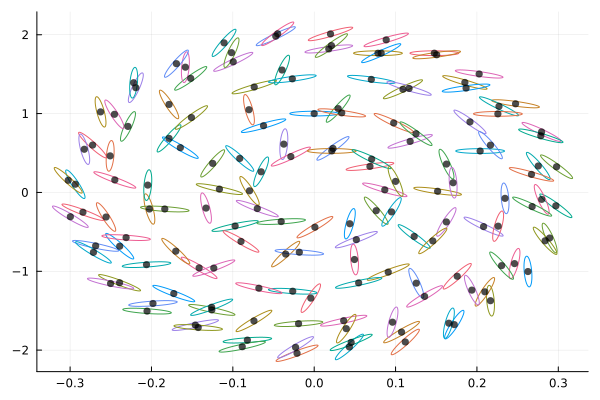

In [27]:
begin
    plot(xjet_plot2, vjet_plot2, legend=false)
    scatter!(solution[:,1], solution[:,2], color=:black, alpha = 0.7)
end

In [75]:
@taylorize function kepler_eqs!(dq, q, params, t)
    dq[1] = q[3]
    dq[2] = q[4]
    rr = ( q[1]^2 + q[2]^2 )^(3/2)
    dq[3] = - q[1] / rr
    dq[4] = - q[2] / rr
end

In [76]:
t0 = 0.0  
tf = 6.3
step = 0.5
time_vector = t0:step:tf
order = 25
abstol = 1e-20

1.0e-20

In [94]:
const mu = 1.0
const mass = 1.0
const aKep = 1.0
const eKep = 0.8

function ini_cond(a, e)
    x0  = a*(one(e)-e)
    vy0 = mass * sqrt( mu * a * (1-e^2) ) / x0
    y0  = zero(vy0)
    vx0 = zero(vy0)
    return [x0, y0, vx0, vy0]
end
q0 = ini_cond(aKep, eKep)

4-element Vector{Float64}:
 0.19999999999999996
 0.0
 0.0
 3.0

In [95]:
t, q = taylorinteg(kepler_eqs!, [0.18500000000000005, 0.0, 0.0, 3.1322213859832457], 0.0, 10, 25, 1.0e-20);
t[end], q[end,:]

(10.0, [-1.76443911873355, -0.18192246615809535, 0.17699428684027285, -0.31016186018468556])

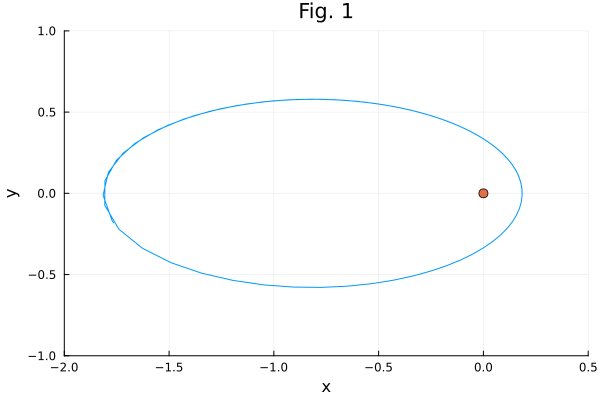

In [96]:
begin
x = view(q, :, 1)
y = view(q, :, 2)
vx = view(q, :, 3)
vy = view(q, :, 4)
plot(x, y, legend=false)
scatter!([0], [0], shape=:circle, ms=5)
xaxis!("x", (-2.0, 0.5))
yaxis!("y", (-1.0, 1.0))
title!("Fig. 1")
end

In [97]:
solution1 = taylorinteg(kepler_eqs!, [0.18500000000000005, 0.0, 0.0, 3.1322213859832457], time_vector, order, abstol, maxsteps=5000)

13×4 transpose(::Matrix{Float64}) with eltype Float64:
  0.185      0.0         0.0         3.13222
 -0.529263   0.555302   -1.24922     0.215836
 -1.037      0.565001   -0.825659   -0.108932
 -1.38069    0.477834   -0.564407   -0.224358
 -1.61168    0.350225   -0.366457   -0.279905
 -1.75199    0.202433   -0.198082   -0.307857
 -1.81196    0.0451799  -0.0430168  -0.318726
 -1.79545   -0.114013    0.109366   -0.315793
 -1.70144   -0.268197    0.268709   -0.298214
 -1.52358   -0.408887    0.447314   -0.260282
 -1.24747   -0.52247     0.66667    -0.185292
 -0.842087  -0.579248    0.978042   -0.0153566
 -0.227302  -0.468831    1.55286     0.65361

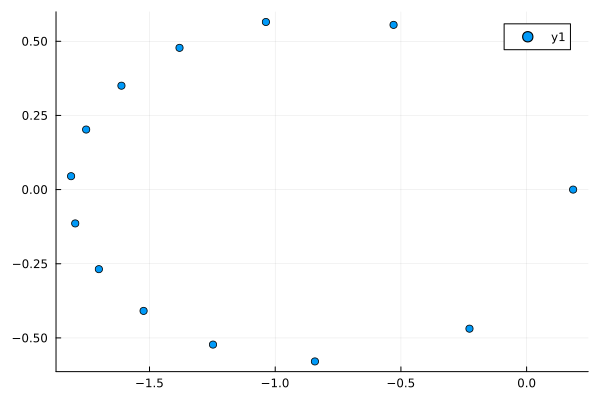

In [98]:
scatter(solution1[:,1], solution1[:,2])

In [99]:
varorder = 5
ξ = set_variables("ξ", numvars=4, order=varorder)
q0TN = q0 .+ ξ

4-element Vector{TaylorN{Float64}}:
  0.19999999999999996 + 1.0 ξ₁ + 𝒪(‖x‖⁶)
                        1.0 ξ₂ + 𝒪(‖x‖⁶)
                        1.0 ξ₃ + 𝒪(‖x‖⁶)
                  3.0 + 1.0 ξ₄ + 𝒪(‖x‖⁶)

In [86]:
sum(TaylorSeries.size_table)

126

In [87]:
@time result = taylorinteg(kepler_eqs!, q0TN, time_vector, order, abstol, maxsteps=5000)

  1.914208 seconds (11.38 M allocations: 1.747 GiB, 10.73% gc time)


13×4 transpose(::Matrix{TaylorN{Float64}}) with eltype TaylorN{Float64}:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [108]:
exs = -0.01:0.001:0.01

q0s =[ini_cond.(aKep, eKep .+ exs)[i] .- q0 for i in 1:length(exs)]

21-element Vector{Vector{Float64}}:
 [0.010000000000000009, 0.0, 0.0, -0.08044360838679365]
 [0.009000000000000008, 0.0, 0.0, -0.07265000547754408]
 [0.008000000000000007, 0.0, 0.0, -0.06480245717862854]
 [0.007000000000000006, 0.0, 0.0, -0.056900316198537304]
 [0.006000000000000005, 0.0, 0.0, -0.04894292429345404]
 [0.0050000000000000044, 0.0, 0.0, -0.04092961202751866]
 [0.0040000000000000036, 0.0, 0.0, -0.032859698526634507]
 [0.0030000000000000027, 0.0, 0.0, -0.02473249122562482]
 [0.0020000000000000018, 0.0, 0.0, -0.01654728560851737]
 [0.0010000000000000009, 0.0, 0.0, -0.008303364941741442]
 [0.0, 0.0, 0.0, 0.0]
 [-0.0010000000000000009, 0.0, 0.0, 0.008363551215412546]
 [-0.0020000000000000018, 0.0, 0.0, 0.01678804376610188]
 [-0.0030000000000000027, 0.0, 0.0, 0.025274246074129536]
 [-0.0040000000000000036, 0.0, 0.0, 0.03382294022790022]
 [-0.0050000000000000044, 0.0, 0.0, 0.04243492229665602]
 [-0.006000000000000005, 0.0, 0.0, 0.051111002653863924]
 [-0.007000000000000006, 0.0, 

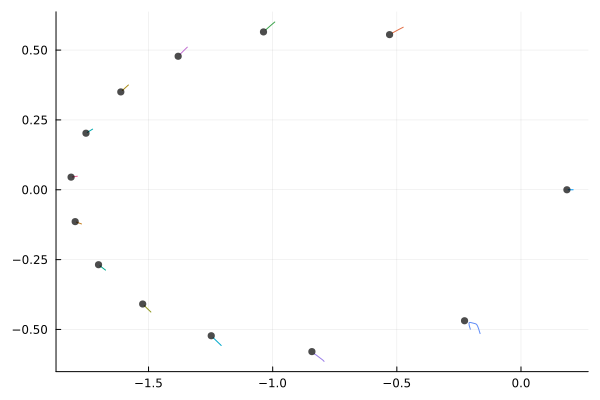

In [109]:

xjet_plot2 = map(λ->λ.(q0s), result[:,1])
vjet_plot2 = map(λ->λ.(q0s), result[:,2])

plot(xjet_plot2, vjet_plot2, legend=false)
scatter!(solution1[:,1], solution1[:,2], color=:black, alpha = 0.7)

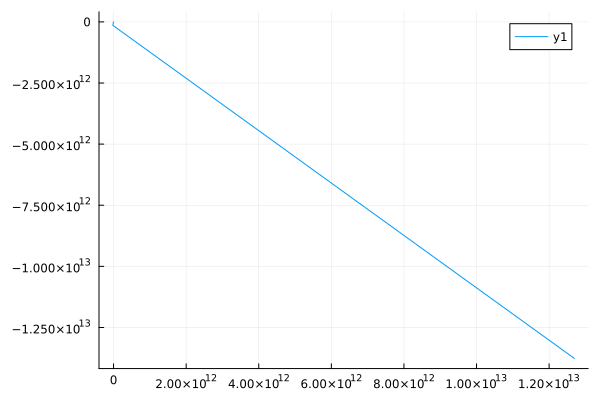

In [91]:
res = []
vel = []
for i in 1:13
    xv = evaluate(result[i, :],  [0.18500000000000005, 0.0, 0.0, 3.1322213859832457])
    push!(res, xv[1])
    push!(vel, xv[2])
end

plot(res, vel)  